## Projection pursuit  (Approximate Newton Method)

In [1]:
import numpy as np
import numpy.linalg as LA
from math import *
import matplotlib.pyplot as plt

def whiten(x):
    x -= x.mean()
    x /= x.std()

def normalize(x):
    x /= LA.norm(x)
    
def update(X, gp, g):
    global b
    s = np.dot(b, X)
    b = gp(s).mean() * b - (g(s) * X).mean(axis=1)
    normalize(b)
    
def estimate(g, gp, outlier=False):
    global b
    N = 1000
    b = np.random.randn(2)
    normalize(b)

    for t in range(10):
        x = np.random.randn(N)
        y = np.random.rand(N)
        if outlier:
            x = np.append(x, 10)
            y = np.append(y, 1)
        whiten(x)
        whiten(y)
        X = np.c_[x,y].T
        update(X, gp, g)
        plt.scatter(x, y, marker='.')

    U, V = b
    plt.quiver(U, V, angles='xy', scale_units='xy', scale=1)
    plt.show()

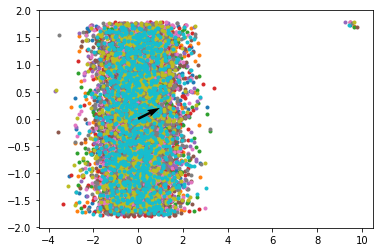

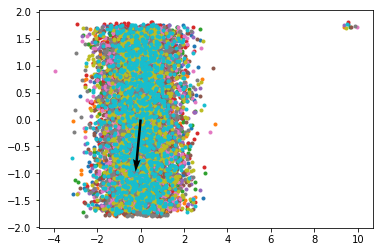

In [2]:
estimate(lambda s: s**3, lambda s: 3*s**2, outlier=True)
estimate(lambda s: np.tanh(s), lambda s: 1-np.tanh(s)**2, outlier=True)